In [11]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import plotly.io as pio
pio.templates.default = "plotly_white"
import pandas as pd
from pathlib import Path
from tqdm.autonotebook import tqdm
import missingno as msno
from itertools import cycle
from sklearn.metrics import mean_absolute_error
from IPython.display import display, HTML
# %load_ext autoreload
# %autoreload 2
np.random.seed()
tqdm.pandas()

In [12]:


def format_plot(fig, legends = None, font_size=15, title_font_size=20):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=900,
            height=500,
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": title_font_size
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text="Value",
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text="Day",
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            )
        )
    return fig



In [3]:
import pandas as pd
import tqdm
DATA_FOLDER_PATH = "/home/bilal326/Desktop/Time_Series/data/london_smart_meters"

block_df = pd.read_parquet(f"{DATA_FOLDER_PATH}/preprocessed/london_smart_meters_merged_block_0-7.parquet")

In [4]:
from data_utils import compact_to_expanded

exp_block_df = compact_to_expanded(block_df[block_df.file=="block_7"], timeseries_col = 'energy_consumption',\
                                   static_cols = ["frequency", "series_length", "stdorToU", "Acorn", "Acorn_grouped",\
                                                   "file"],time_varying_cols = ['holidays', 'visibility', 'windBearing', 'temperature','dewPoint',\
                                                                                'pressure', 'apparentTemperature', 'windSpeed', 'precipType', 'icon', 'humidity', 'summary'],\
                                                                                    ts_identifier = "LCLid")

plot_df = pd.pivot_table(exp_block_df, index="timestamp", columns="LCLid", values="energy_consumption")

/home/bilal326/Desktop/Time_Series/chp02/data_utils.py:6: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
100%|██████████| 50/50 [00:00<00:00, 77.60it/s]


/home/bilal326/Desktop/Time_Series/venv/lib/python3.10/site-packages/missingno/missingno.py:106: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_array = pd.date_range(df.index[0], df.index[-1],
/home/bilal326/Desktop/Time_Series/venv/lib/python3.10/site-packages/missingno/missingno.py:109: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_ticks = pd.date_range(df.index[0], df.index[-1],


<Axes: >

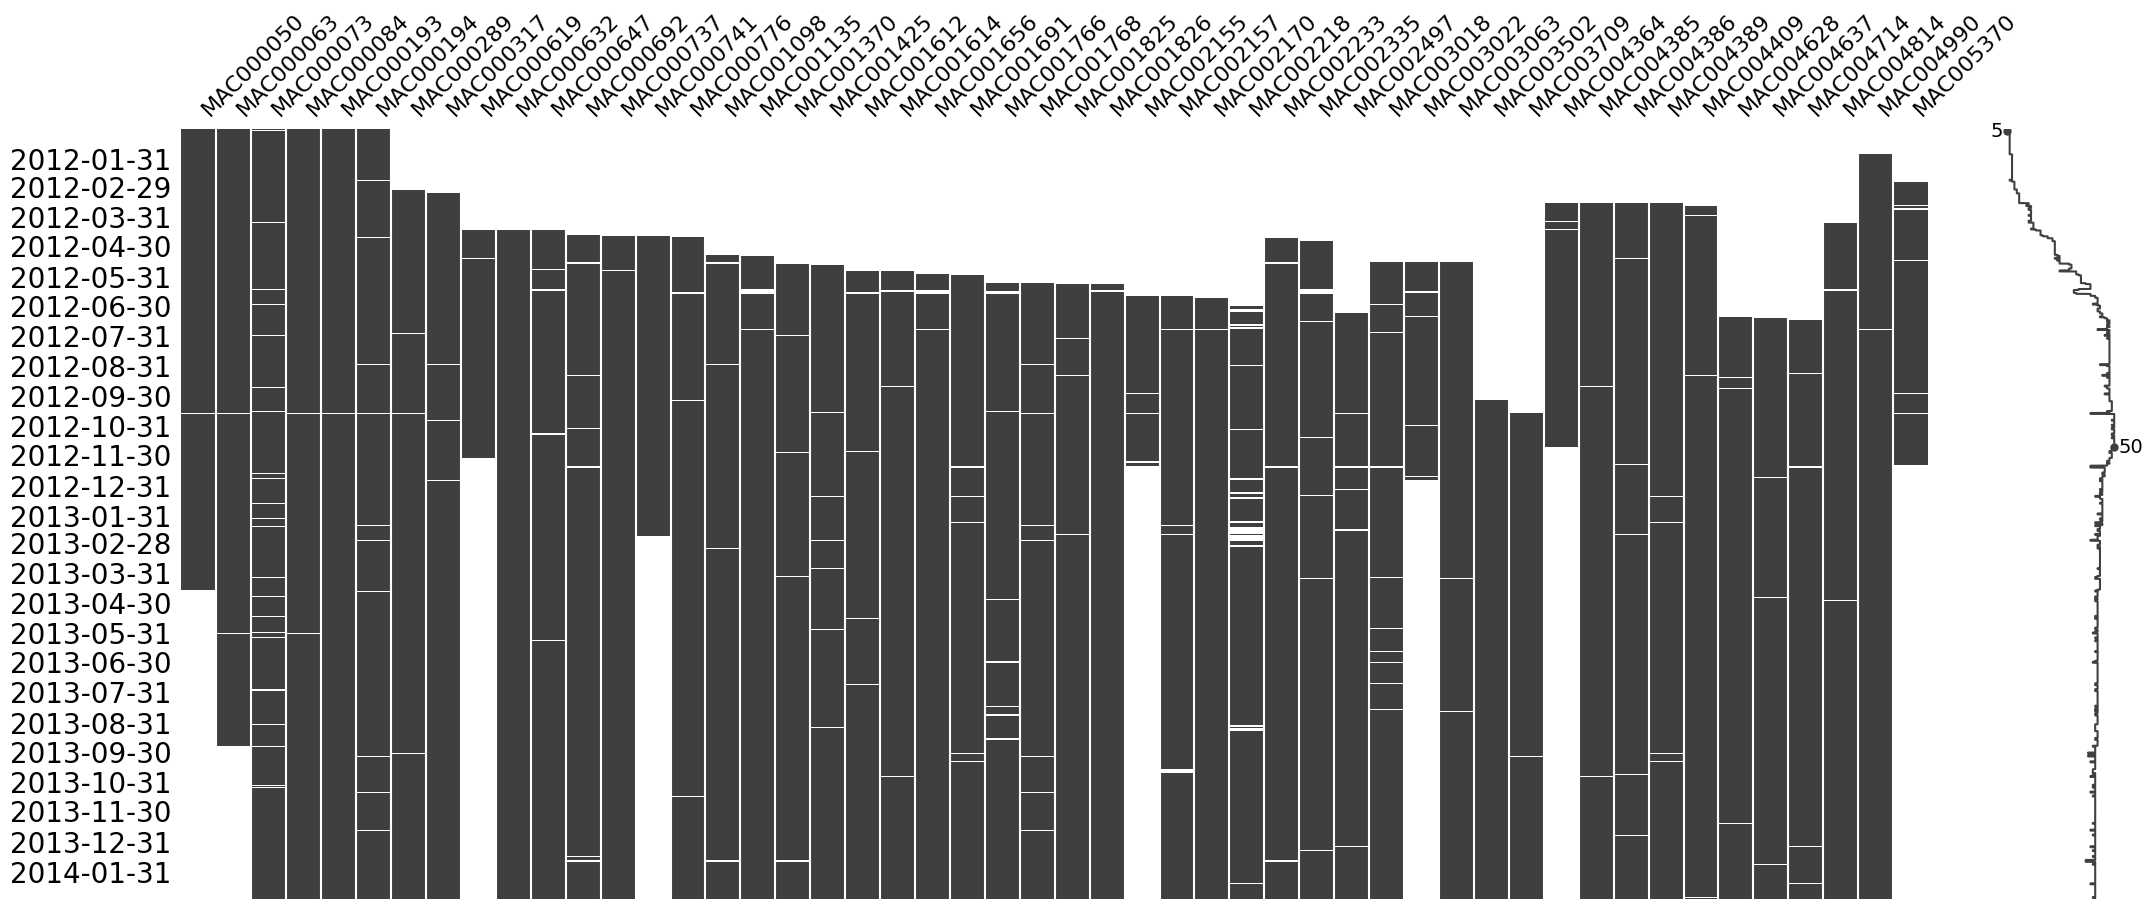

In [6]:
import missingno as msno
%matplotlib inline

msno.matrix(plot_df, freq="M")

<Axes: >

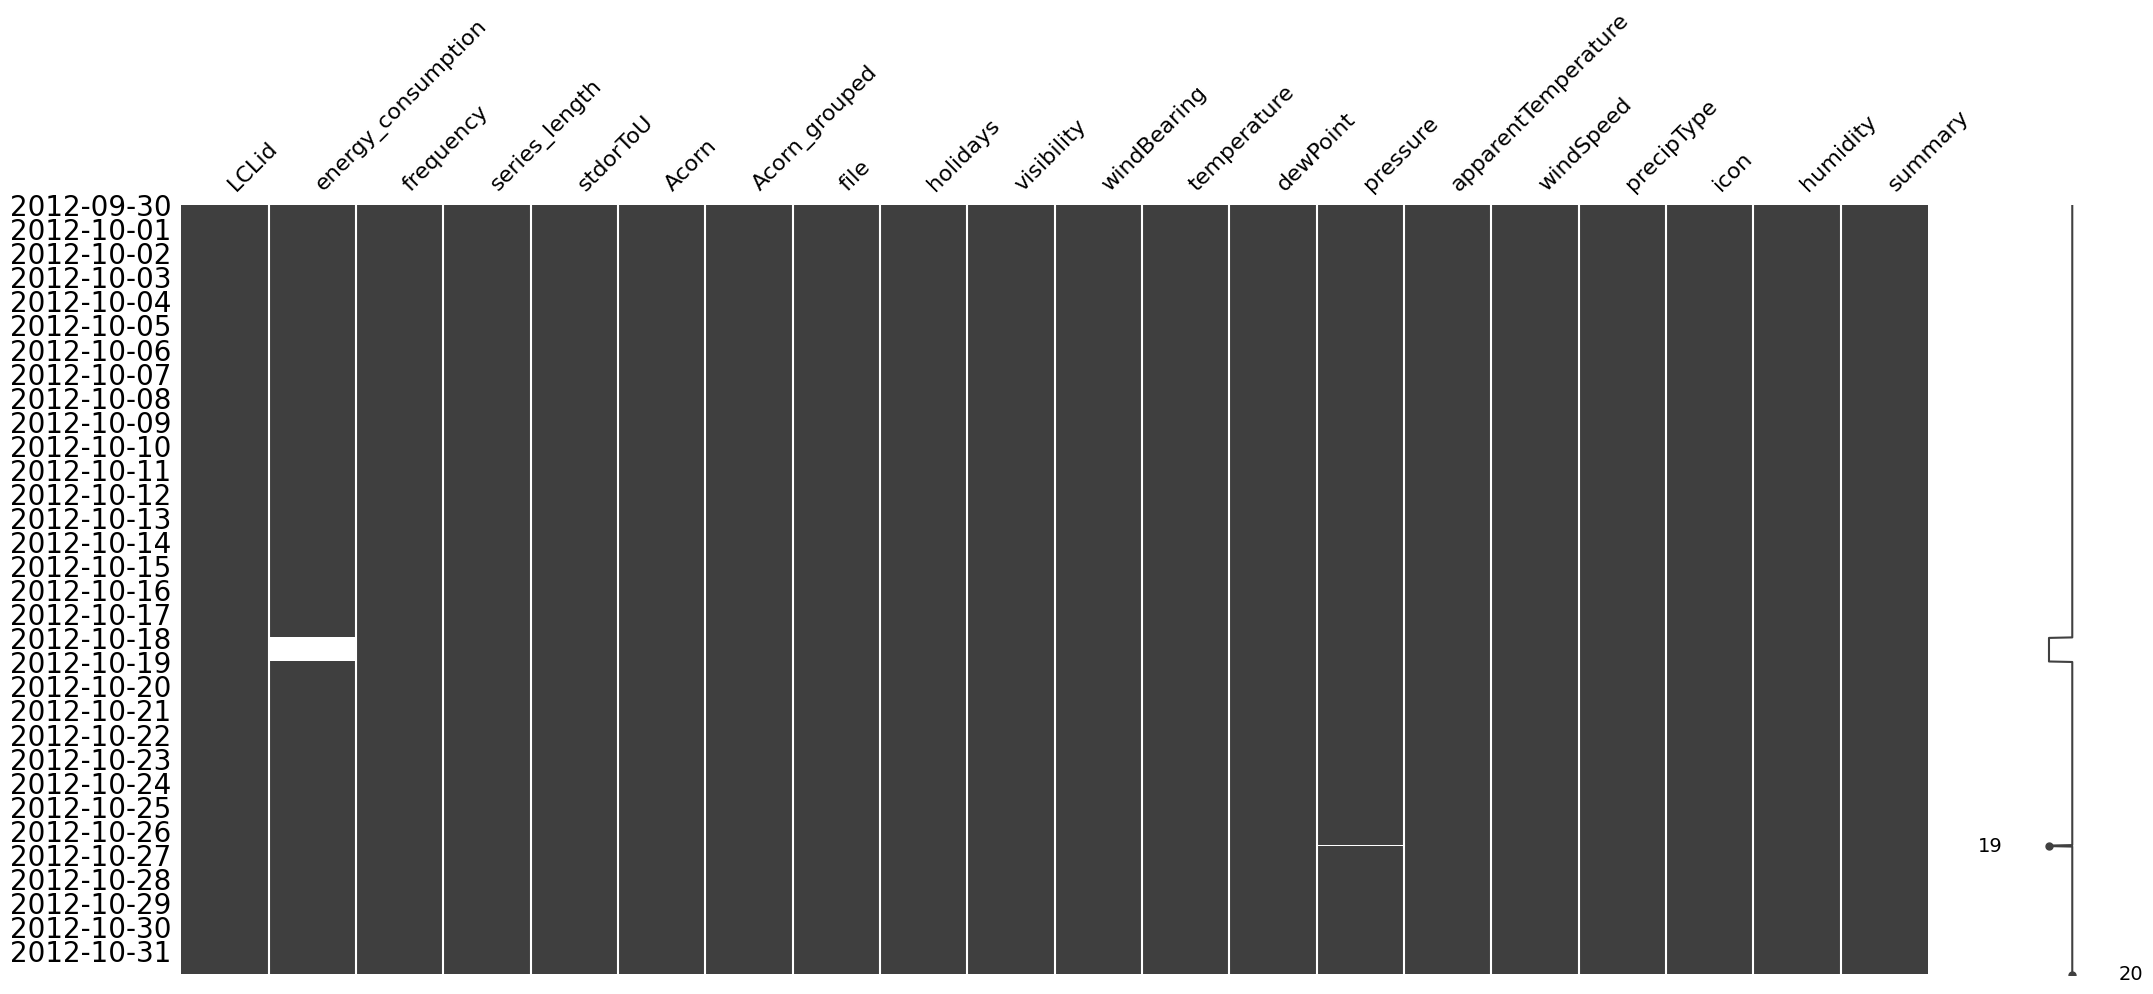

In [7]:
ts_df = exp_block_df[exp_block_df.LCLid=="MAC000193"].set_index("timestamp")
msno.matrix(ts_df["2012-09-30": "2012-10-31"], freq="D")

In [8]:
ts_df.head()

,LCLid,energy_consumption,frequency,series_length,stdorToU,Acorn,Acorn_grouped,file,holidays,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
timestamp,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,MAC000193,0.368,30min,37872,ToU,ACORN-D,Affluent,block_7,NO_HOLIDAY,12.99,229,12.12,10.97,1008.10,12.12,5.90,rain,partly-cloudy-night,0.93,Mostly Cloudy
2012-01-01 00:30:00,MAC000193,0.386,30min,37872,ToU,ACORN-D,Affluent,block_7,NO_HOLIDAY,12.99,229,12.12,10.97,1008.10,12.12,5.90,rain,partly-cloudy-night,0.93,Mostly Cloudy
2012-01-01 01:00:00,MAC000193,0.170,30min,37872,ToU,ACORN-D,Affluent,block_7,NO_HOLIDAY,12.89,238,12.59,11.02,1007.88,12.59,6.06,rain,cloudy,0.90,Overcast
2012-01-01 01:30:00,MAC000193,0.021,30min,37872,ToU,ACORN-D,Affluent,block_7,NO_HOLIDAY,12.89,238,12.59,11.02,1007.88,12.59,6.06,rain,cloudy,0.90,Overcast
2012-01-01 02:00:00,MAC000193,0.038,30min,37872,ToU,ACORN-D,Affluent,block_7,NO_HOLIDAY,11.54,229,12.45,11.04,1007.95,12.45,5.31,rain,partly-cloudy-night,0.91,Mostly Cloudy


Let’s introduce an artificial missing data section:

In [9]:
import numpy as np

window = slice("2012-10-07", "2012-10-08")
ts_df['energy_consumption_missing'] = ts_df.energy_consumption
ts_df.loc[window, "energy_consumption_missing"] = np.nan

In [14]:
vis_window = slice(pd.to_datetime(window.start) - pd.Timedelta(days=2), pd.to_datetime(window.stop) + pd.Timedelta(days=2))
import plotly.express as px
fig = px.line(ts_df[vis_window], y="energy_consumption_missing", title=f"MAC000193 Energy Consumption between {vis_window.start.strftime('%Y-%m-%d')} and {vis_window.stop.strftime('%Y-%m-%d')}")
fig.show()

We are missing 2 whole days of energy consumption readings, which means there are 96 missing data
points (half-hourly). If we use one of the techniques we saw earlier, such as interpolation, we will see
that it will mostly be a straight line because none of the methods are complex enough to capture the
pattern over a long time.

1. previous day
2. Hourly Profile
3. Weekday-Hourly Profile
4. Seasonal Interpolation